# Individual Project

### Data Loading

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(RColorBrewer)
library(gridExtra)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
players_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/sessions.csv"
players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)
players_data <- players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashed_email, name, gender
dbl (2): played_hours, age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description - players.csv

### General Information
- Number of observations: 196
- Number of variables: 7
- Missing values in Age column (2 missing entries).

### Statistic Summary

In [3]:
general_summary_table <- players_data |>
  summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_Age = mean(age, na.rm = TRUE))
general_summary_table

mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,20.52062


### Key Observations

#### Strengths:
- Dataset has no missing values in metrics like played_hours and experience that could be key in analysis.
- The hashed_email variable ensures each player is uniquely associated to their data.

#### Weaknesses: 
- Their are outliers within played_hours, as only 15 players played above 5 hours.
- Data collection may be flawed due to participants in the survey incorrectly selecting for variables like age and experience level.
- Ambiguity in defining experience categories which may impact predictive modeling.

#### Variable Table

| Variable    | Type      | Description                                    | Unique Values                        | Notes |
|:------------|:----------|:-----------------------------------------------|:-------------------------------------|:---------------------------------------|
| Experience  | character | Player's experiennce level                     | Veteran/Pro/Amateur/Regular/Beginner | No clear criteria for experience level |
| Subscribe   | logical   | Whether the player is subscribed to the game-related newsletter  | True/False         | N/A                                    |
| HashedEmail | character | Unique set of characters associated with email | 196 values                           | No duplicates                          |
| Played_hours| double    | Total hours played by the player               | 0.0 to 223.1                         | Most Under 5 Played Hours              |
| Name        | character | Player's name                                  | 196 values                           | Not relevant to analysis               | 
| Gender|character|Player's gender identity|Male/Female/Other/Non-binary/Agender/Two-Spirited/PreferNotToSay| Minimally relevant to analysis due class imbalance|
| Age         | double    | Player's age                                   | 8 to 50                              | Can User's avoid inputting their age?  |

### Questions

**Question**: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
**Predictive Question**: Can we predict which players are most likely to contribute a large amount of data(played_hours) based on the experience and subscription variables?

We want to attract the players who play the most on the server, so metrics such as their experience level and commitment to the project based on a newsletter subscription may be key indicators. Since both variables are characters, I will have to refactor both columns to utilize them in a regression model to predict the quantitative value of played_hours.

### Exploratory Data Analysis and Visualization

In [4]:
grouped_summary_table <- players_data |>
    group_by(experience, subscribe) |>
  summarize( mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_Age = mean(age, na.rm = TRUE))
grouped_summary_table

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,mean_played_hours,mean_Age
<chr>,<lgl>,<dbl>,<dbl>
Amateur,FALSE,0.3666667,23.11111
Amateur,TRUE,8.2777778,19.11111
Beginner,FALSE,1.1750000,26.75000
⋮,⋮,⋮,⋮
Regular,TRUE,22.5965517,19.82143
Veteran,FALSE,0.5066667,21.80000
Veteran,TRUE,0.7121212,20.57576


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


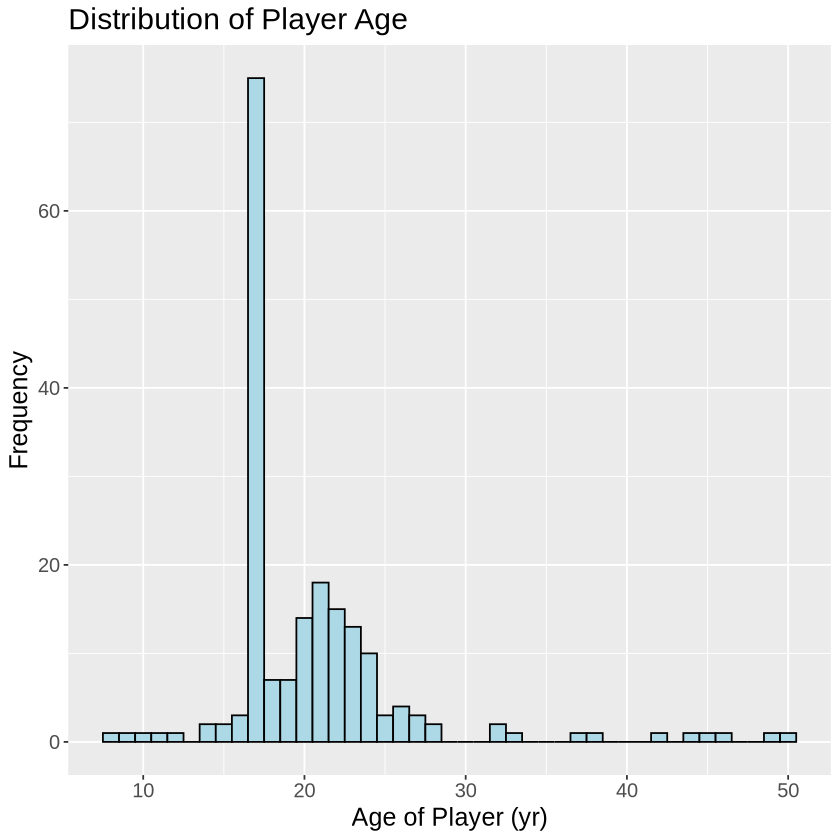

In [5]:
# Visualize the distribution of age
age_plot <- ggplot(players_data, aes(x = age)) + 
    geom_histogram(binwidth = 1, fill = "light blue", color = "black") + 
    labs(title = "Distribution of Player Age", x = "Age of Player (yr)", y = "Frequency") +
    theme(text = element_text(size = 15))
age_plot

Initially, I was going to use age as an explanatory variable, but since there is an imbalance in the distribution, I don't think it will help when modelling. 

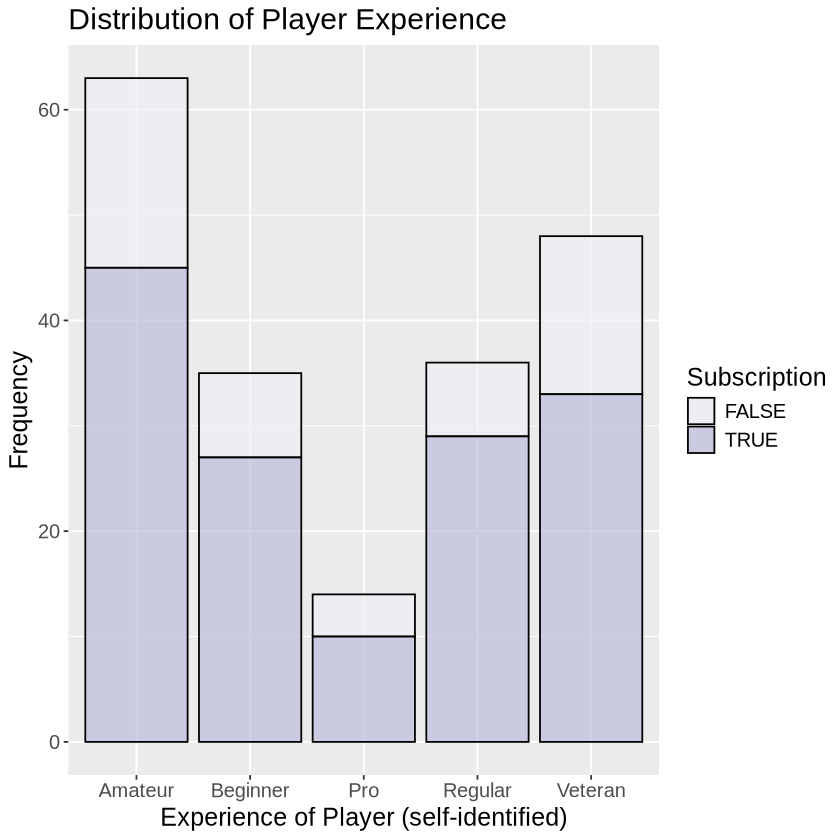

In [6]:
# Visualize the frequency of each type of experience level and ratio of subscription
experience_frq_plot <- ggplot(players_data, aes(x = experience, fill = subscribe)) + 
    geom_bar(color = "black", alpha = 0.7) + 
    scale_fill_brewer(palette = "Purples") +
    labs(x = "Experience of Player (self-identified)", y = "Frequency", fill = "Subscription", title = "Distribution of Player Experience") +
    theme(text = element_text(size = 15))
experience_frq_plot

Most of the individuals in the data set are suprisinly subscribed to the newsletter, with similar proportions of TRUE and FALSE across all the levels of experience.

`summarise()` has grouped output by 'rank'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'rank'. You can override using the
`.groups` argument.


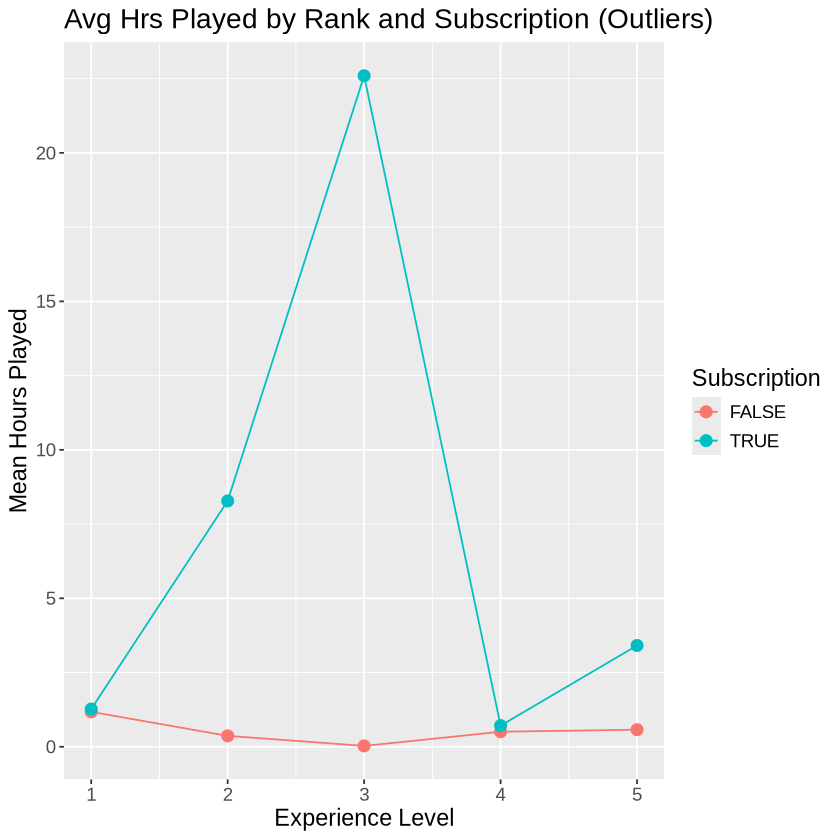

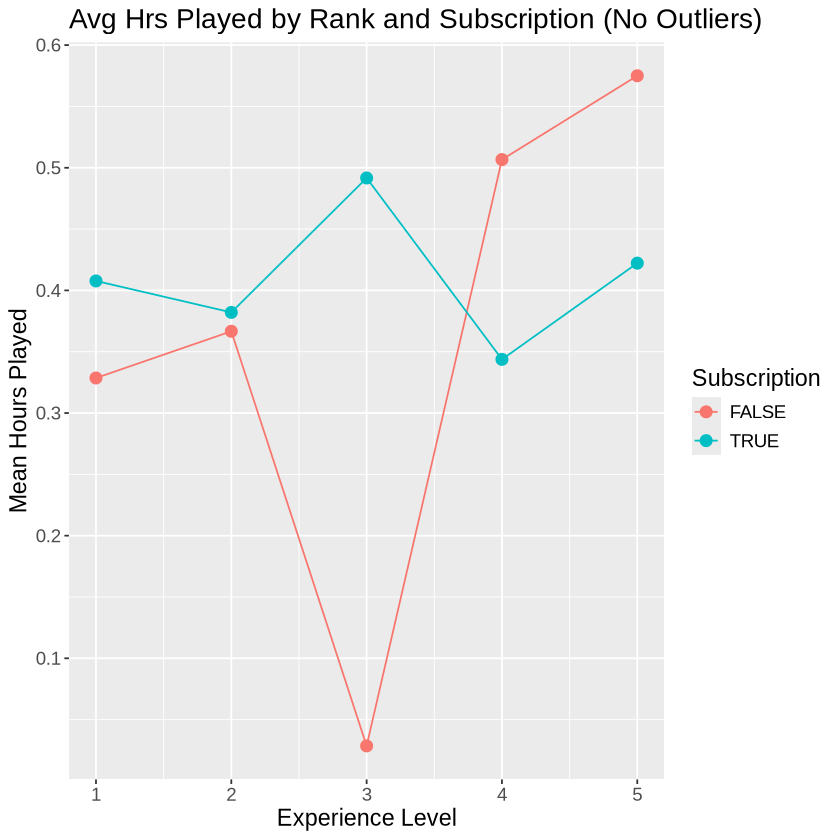

In [7]:
# Wrangling Data for the Plot
players_data_ranks <- players_data |>
    mutate(rank = as.integer(factor(experience, 
                                      levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))))

# Finding average played hours based on rank and subscription
players_data_avg_hours <- players_data_ranks |>
  group_by(rank, subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ungroup()

# Visualize average hours against experience level
players_plot_outliers <- players_data_avg_hours |>
    ggplot(aes(x = rank, y = mean_hours, color = subscribe)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Experience Level", y = "Mean Hours Played", color = "Subscription", title = "Avg Hrs Played by Rank and Subscription (Outliers)") +
    theme(text = element_text(size = 14))
players_plot_outliers

# Remove Outliers
players_data_low_hours <- players_data_ranks |>
    filter(played_hours < 5)

# Finding average played hours based on rank and subscription without outliers
players_data_avg_low_hours <- players_data_low_hours |>
  group_by(rank, subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ungroup()

# Visualize average hours against experience level
players_plot_no_outliers <- players_data_avg_low_hours |>
    ggplot(aes(x = rank, y = mean_hours, color = subscribe)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Experience Level", y = "Mean Hours Played", color = "Subscription", title = "Avg Hrs Played by Rank and Subscription (No Outliers)") +
    theme(text = element_text(size = 14))
players_plot_no_outliers

These graphs help illustrate how the experience level and whether or not a player is subscribed to the newsletter will impact the amount of time played. There is a clear distinction not only based on the experience level but also based on the subscribe variable. Nevertheless, the second plot removed the outliers to visualize the relationship without them.

### Methods and Plans

I propose using k-nearest neighbours regression to predict the number of hours played, as regression is utilized to predict strictly quantitative values. Linear regression was rejected due to outliers having too much influence on the line of best fit, and this small data set has numerous. A strength of K-NN regression is that it is a simple algorithm that requires few assumptions outside of scaling the data. However, a limitation of KNN is its poor performance when predicting values outside the training range, and with larger data sets, it becomes slow. In terms of assessing performance and finding a neighbour value, I’ll evaluate the metrics RMSE and RMSPE. Specifically, I’ll first start by splitting the dataset into 75% for training and 25% for testing, based on the played_hours. Then, I’ll use 5-set cross-validation and provide a range of k values from 1-10 to ensure the selected k performs consistently on the training data before implementing the model on the testing data.